**Summary**: A [kaggle](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset) dataset was analyzed and built to output specific metrics for the user to read. 

Used in "Growify ML Models" app

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier

# Read/Analyze Data

In [2]:
df = pd.read_csv('D:/ML_Data/crop_recommendation/Crop_recommendation.csv')

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data = df.copy()

In [5]:
data.columns = ['Nitrogen NPK Ratio', 'Phosphorous NPK Ratio', 'Potassium NPK Ratio', 'Temperature (°C)', 'Humidity (%)', 'pH', 'Rainfall (mm)', 'Crop Type']

In [6]:
data

,Nitrogen NPK Ratio,Phosphorous NPK Ratio,Potassium NPK Ratio,Temperature (°C),Humidity (%),pH,Rainfall (mm),Crop Type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


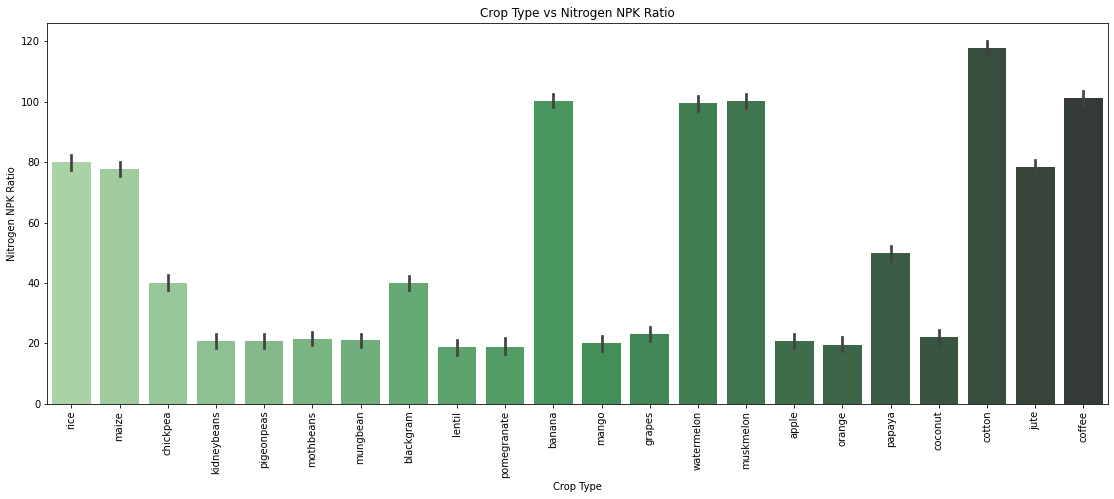

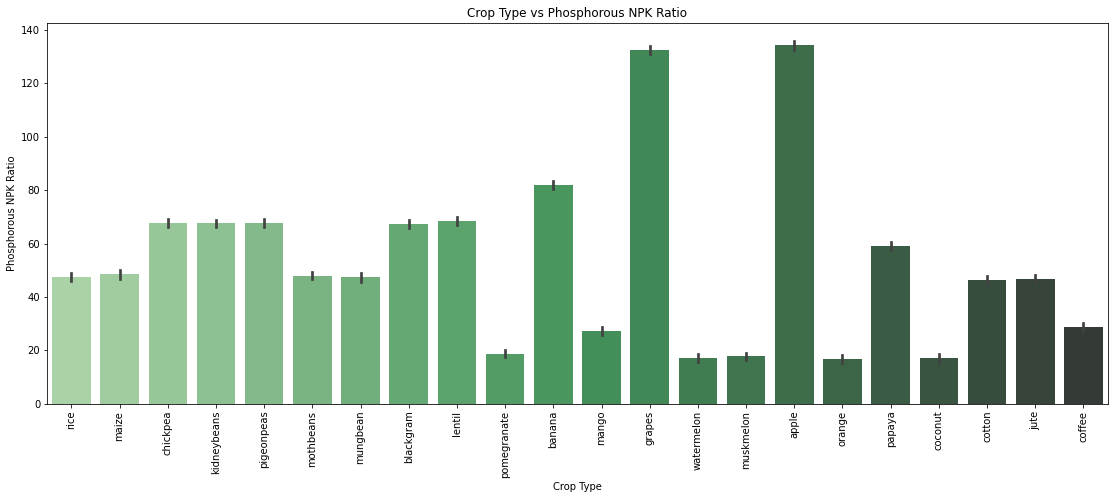

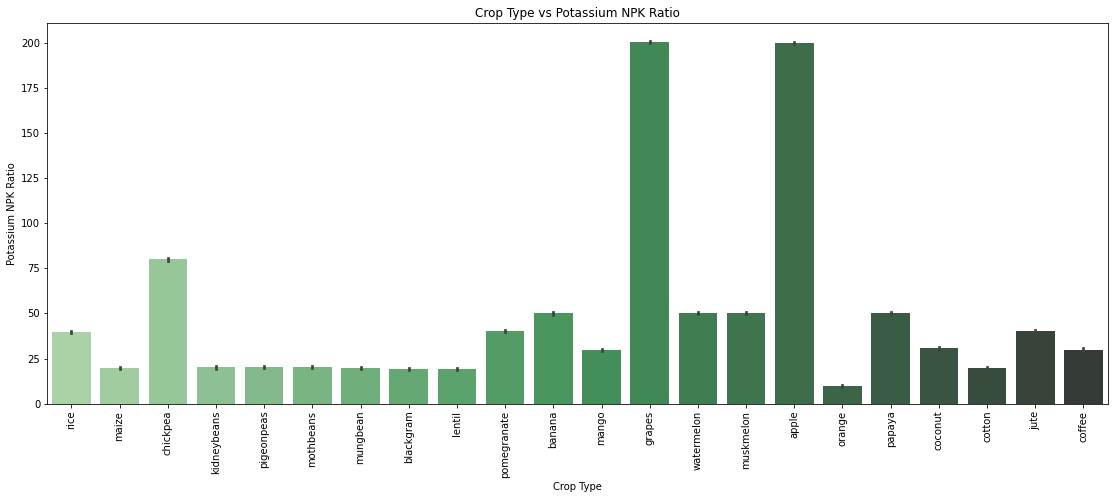

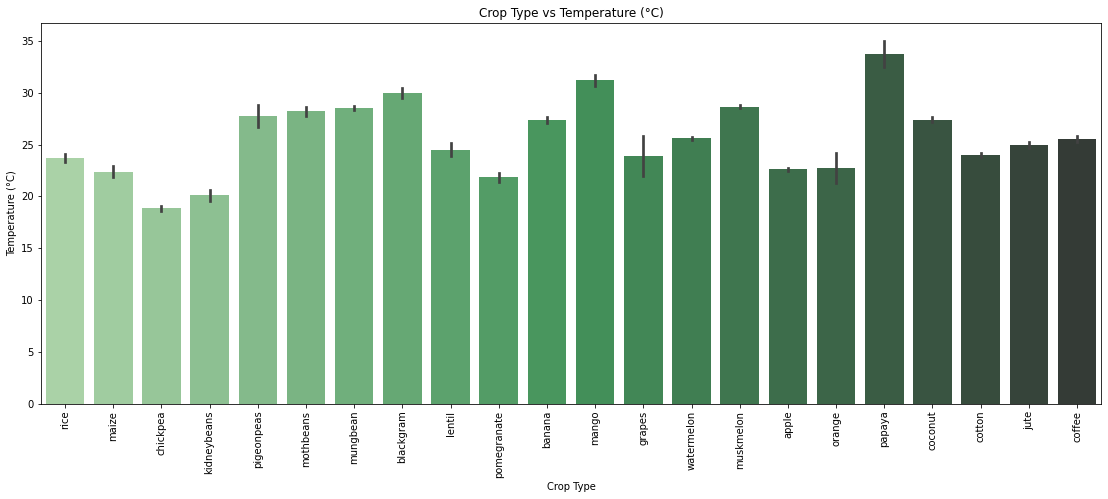

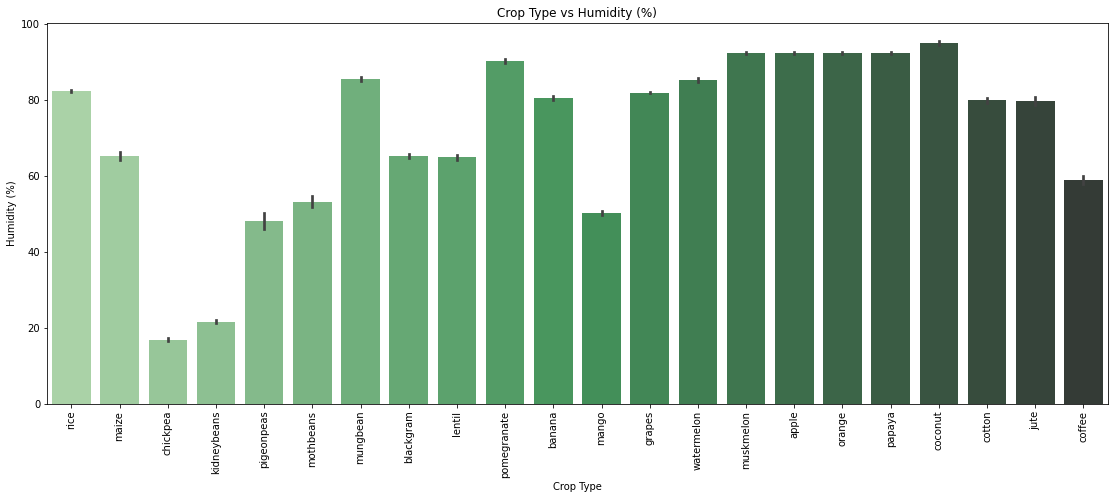

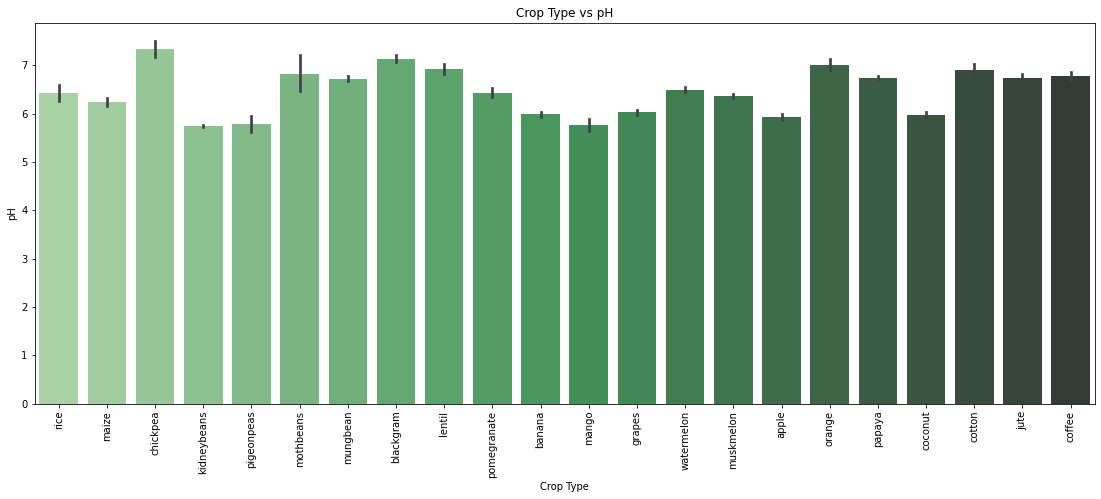

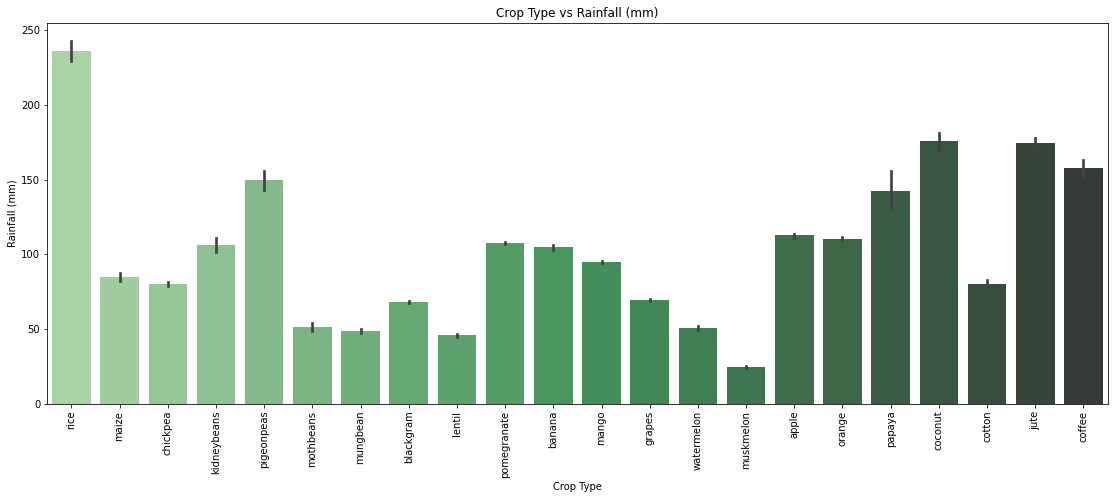

In [7]:
for column in data.drop(columns='Crop Type'):
    plt.figure(figsize=(19,7)).patch.set_facecolor('white')
    sns.barplot(x = "Crop Type", y = column, data = data,  palette="Greens_d")
    plt.xticks(rotation=90)
    plt.title(f"Crop Type vs {column}")
    plt.show()

In [8]:
data

,Nitrogen NPK Ratio,Phosphorous NPK Ratio,Potassium NPK Ratio,Temperature (°C),Humidity (%),pH,Rainfall (mm),Crop Type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
classes = data['Crop Type'].unique()

In [10]:
classes = classes.tolist()

In [11]:
classes

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [12]:
len(classes)

22

# Store Optimal Metrics in a Dataframe/csv

In [13]:
for i in classes:
    print(f'\nOptimal {i} metrics')
    print('-----------------')
    print(data.loc[data['Crop Type'] == i].mean())


Optimal rice metrics
-----------------
Nitrogen NPK Ratio        79.890000
Phosphorous NPK Ratio     47.580000
Potassium NPK Ratio       39.870000
Temperature (°C)          23.689332
Humidity (%)              82.272822
pH                         6.425471
Rainfall (mm)            236.181114
dtype: float64

Optimal maize metrics
-----------------
Nitrogen NPK Ratio       77.760000
Phosphorous NPK Ratio    48.440000
Potassium NPK Ratio      19.790000
Temperature (°C)         22.389204
Humidity (%)             65.092249
pH                        6.245190
Rainfall (mm)            84.766988
dtype: float64

Optimal chickpea metrics
-----------------
Nitrogen NPK Ratio       40.090000
Phosphorous NPK Ratio    67.790000
Potassium NPK Ratio      79.920000
Temperature (°C)         18.872847
Humidity (%)             16.860439
pH                        7.336957
Rainfall (mm)            80.058977
dtype: float64

Optimal kidneybeans metrics
-----------------
Nitrogen NPK Ratio        20.750000
Phosp

In [14]:
d = dict.fromkeys(classes, 1)

In [15]:
for i in classes:
    a = []
    series = data.loc[data['Crop Type'] == i].mean()
    for j in series:
        a.append(j)
    d[i] = a
    a = []

In [39]:
df_optimal = pd.DataFrame.from_dict(d, orient='index', columns=list(data.columns)[:7])

In [40]:
df_optimal

,Nitrogen NPK Ratio,Phosphorous NPK Ratio,Potassium NPK Ratio,Temperature (°C),Humidity (%),pH,Rainfall (mm)
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778
pigeonpeas,20.73,67.73,20.29,27.741762,48.061633,5.794175,149.457564
mothbeans,21.44,48.01,20.23,28.194920,53.160418,6.831174,51.198487
mungbean,20.99,47.28,19.87,28.525775,85.499975,6.723957,48.403601
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
lentil,18.77,68.36,19.41,24.509052,64.804785,6.927932,45.680454
pomegranate,18.87,18.75,40.21,21.837842,90.125504,6.429172,107.528442


In [42]:
df_optimal.to_csv('optimal_growth_factors.csv', index=True)